# Import and Load


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from pandas.api.types import is_numeric_dtype

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
housing = pd.read_csv("/content/drive/MyDrive/Datathon/train.csv")
Test = pd.read_csv("/content/drive/MyDrive/Datathon/test.csv")
housing.head()

,Characteristics.LotFeatures,Characteristics.LotSizeSquareFeet,ImageData.c1c6.summary.bathroom,ImageData.c1c6.summary.exterior,ImageData.c1c6.summary.interior,ImageData.c1c6.summary.kitchen,ImageData.c1c6.summary.property,ImageData.features_reso.results,ImageData.q1q6.summary.bathroom,ImageData.q1q6.summary.exterior,...,Structure.FireplacesTotal,Structure.GarageSpaces,Structure.Heating,Structure.LivingArea,Structure.NewConstructionYN,Structure.ParkingFeatures,Structure.Rooms.RoomsTotal,Structure.YearBuilt,Tax.Zoning,UnitTypes.UnitTypeType
0,NaN,3200.0,NaN,NaN,NaN,NaN,NaN,"['Cooling.CeilingFans', 'Flooring.Carpet', 'Fl...",NaN,NaN,...,NaN,NaN,NaN,NaN,False,NaN,NaN,0.0,commr,NaN
1,NaN,NaN,NaN,3.8,3.7,3.8,3.8,"['Appliances.GasRange', 'Appliances.Range', 'A...",NaN,4.2,...,NaN,NaN,['natural gas'],3175.0,False,['off alley'],6.0,NaN,NaN,NaN
2,NaN,18750.0,NaN,NaN,NaN,NaN,NaN,"['Flooring.Carpet', 'ParkingFeatures.Garage', ...",NaN,NaN,...,NaN,NaN,NaN,NaN,False,NaN,NaN,1926.0,commr,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['CommunityFeatures.Lake', 'WaterfrontFeatures...",NaN,NaN,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,agric,NaN
4,"['horses allowed', 'paddock', 'pond(s)']",NaN,NaN,3.6,NaN,NaN,3.6,"['Appliances.Refrigerator', 'Appliances.Microw...",NaN,4.2,...,NaN,NaN,['other'],0.0,False,"['unassigned', 'off street']",4.0,2006.0,NaN,NaN


# Remove too many NaN and expand strings

In [7]:
perce_miss = housing.isna().sum()/len(housing)
perce_miss

,0
Characteristics.LotFeatures,0.608887
Characteristics.LotSizeSquareFeet,0.984270
ImageData.c1c6.summary.bathroom,0.155375
ImageData.c1c6.summary.exterior,0.182879
ImageData.c1c6.summary.interior,0.128820
ImageData.c1c6.summary.kitchen,0.140706
ImageData.c1c6.summary.property,0.040787
ImageData.features_reso.results,0.024731
ImageData.q1q6.summary.bathroom,0.155710
ImageData.q1q6.summary.exterior,0.231503


In [8]:
to_remove = []
for i in perce_miss:
      if i >0.85:
        print(perce_miss[perce_miss == i].index[0], i )
        to_remove.append(perce_miss[perce_miss == i].index[0])

Characteristics.LotSizeSquareFeet 0.9842698511685918
Location.Address.PostalCodePlus4 0.9695542503979077
Location.Address.StreetDirectionSuffix 0.9940337127805132
Structure.BelowGradeFinishedArea 0.8675037463816003
Structure.BelowGradeUnfinishedArea 0.8913409719184266
Structure.ParkingFeatures 0.8738144214749108
Tax.Zoning 0.9302102627586399
UnitTypes.UnitTypeType 0.9536844848608952


In [9]:
housing = housing.drop(columns=to_remove)
Test = Test.drop(columns=to_remove)

In [10]:
print(Test.shape)

(22039, 46)


In [11]:
threshold = 0.2*housing.shape[1]
print(housing.shape)
housing = housing[housing.isnull().sum(axis=1) <= threshold]
print(housing.shape)

(107437, 47)
(93117, 47)


In [12]:
list_cols = ["ImageData.features_reso.results", "Characteristics.LotFeatures", "ImageData.room_type_reso.results",
             "Structure.Basement", "Structure.Cooling", "Structure.Heating"]

In [13]:
def preprocess_housing_data(housing, list_cols, all_possible_features=None):

    # If not provided, calculate all possible features from the training dataset
    if all_possible_features is None:
        all_possible_features = {col: set() for col in list_cols}
        for col in list_cols:
            housing_col = housing[col]
            for ind in housing_col.index:
                if isinstance(housing_col[ind], str):
                    set_feats = set([s[1:-1] for s in housing_col[ind][1:-1].split(", ")])
                    all_possible_features[col] = all_possible_features[col].union(set_feats)

    # Preprocess each column
    for col in list_cols:
        # Create a new column with actual lists, not string lookalikes
        listed_col = col + "List"
        housing[listed_col] = housing[col].apply(
            lambda x: [feat[1:-1] for feat in x[1:-1].split(", ")] if isinstance(x, str) else []
        )

        # Add binary columns for each feature
        for feat in all_possible_features[col]:
            housing[col + "." + feat] = housing[listed_col].apply(lambda features: feat in features)

        # Drop the original and intermediate columns
        housing = housing.drop([col, listed_col], axis=1)

    housing.reset_index(drop=True, inplace=True)
    return housing, all_possible_features


# Preprocess the training set and capture all possible features
housing_expanded, all_features = preprocess_housing_data(housing, list_cols)

# Preprocess the test set using the features extracted from the training set
Test_expanded, _ = preprocess_housing_data(Test, list_cols, all_features)


In [14]:
print(housing_expanded.shape)
print(Test_expanded.shape)

(93117, 483)
(22039, 482)


In [15]:
cols_to_drop = ['Location.Address.CensusBlock','Location.Address.CensusTract','Location.Address.PostalCode','Location.Address.StateOrProvince','Location.Address.StreetName','Location.Address.StreetNumber','Location.Address.UnitNumber','Location.Address.UnparsedAddress','Location.Area.SubdivisionName']

In [16]:
housing_expanded = housing_expanded.drop(columns=cols_to_drop)
housing_expanded = housing_expanded.drop(columns='Listing.ListingId')
Test_expanded = Test_expanded.drop(columns=cols_to_drop)  #keep the Id for the prediction on the test set

In [17]:
print(housing_expanded.shape)
print(Test_expanded.shape)

(93117, 473)
(22039, 473)


In [18]:
# Check if all columns in Test are present in housing_expanded
test_cols = set(Test_expanded.columns)
housing_cols = set(housing_expanded.columns)

missing_cols = test_cols - housing_cols
extra_cols = housing_cols - test_cols

if missing_cols:
    print("Columns in Test not found in housing_expanded:")
    print(missing_cols)
else:
    print("All columns in Test are present in housing_expanded.")

if extra_cols:
    print("\nColumns in housing_expanded not found in Test:")
    print(extra_cols)
else:
    print("\nAll columns in housing_expanded are present in Test.")

Columns in Test not found in housing_expanded:
{'Listing.ListingId'}

Columns in housing_expanded not found in Test:
{'Listing.Price.ClosePrice'}


# Preprocessing

## Transform strings of stories into numbers

In [19]:
def preprocess_column_with_regex(df, column_name, regex_pattern=r'\d+(\.\d+)?'):
    df = df.copy()
    df[column_name] = df[column_name].apply(
        lambda x: float(re.search(regex_pattern, x).group())
        if isinstance(x, str) and re.search(regex_pattern, x) else np.nan
    )
    return df

# Example Usage
# Preprocessing both training and test datasets consistently
column_to_process = 'ImageData.style.stories.summary.label'

# Apply preprocessing to training and test sets
housing_expanded = preprocess_column_with_regex(housing_expanded, column_to_process)
Test_expanded = preprocess_column_with_regex(Test_expanded, column_to_process)

# Print unique values and column type for verification
print("Training Set:")
print(housing_expanded[column_to_process].unique())
print(f"Data type: {housing_expanded[column_to_process].dtype}")

print("\nTest Set:")
print(Test_expanded[column_to_process].unique())
print(f"Data type: {Test_expanded[column_to_process].dtype}")


Training Set:
[2.  nan 1.  3.  1.5 2.5]
Data type: float64

Test Set:
[3.  nan 1.5 1.  2.5 2. ]
Data type: float64


In [20]:
print(housing_expanded.shape)
print(Test_expanded.shape)

(93117, 473)
(22039, 473)


## One-hot encoding

In [21]:
columns_to_encode = [
    'ImageData.style.exterior.summary.label',
    'Location.Address.CountyOrParish',
    'Location.Address.StreetDirectionPrefix',
    'Location.Address.StreetSuffix',
    'Property.PropertyType'
]

housing_hot_encoding = pd.get_dummies(housing_expanded, columns=columns_to_encode, dtype=int)
print(housing_hot_encoding.shape)
Test_hot_encoding = pd.get_dummies(Test_expanded, columns=columns_to_encode, dtype=int)
print(Test_hot_encoding.shape)


(93117, 623)
(22039, 606)


In [22]:
# Identify columns present in Test_hot_encoding but not in housing_hot_encoding
cols_to_remove = set(Test_hot_encoding.columns) - set(housing_hot_encoding.columns)
cols_to_remove.discard('Listing.ListingId')

# Print the names of the columns to be removed
print("Columns to remove:")
for col in cols_to_remove:
    print(col)

# Remove the identified columns from Test_hot_encoding
Test_hot_encoding = Test_hot_encoding.drop(columns=cols_to_remove)

print("\nColumns removed successfully.")

Columns to remove:
Location.Address.CountyOrParish_pike
Property.PropertyType_business opportunity
Property.PropertyType_commercial lease
Property.PropertyType_farm
Location.Address.CountyOrParish_mcdonough
Property.PropertyType_commercial sale
Location.Address.CountyOrParish_cass

Columns removed successfully.


In [23]:
print(housing_hot_encoding.shape)
print(Test_hot_encoding.shape)

(93117, 623)
(22039, 599)


## One-hot for the highest values because there are too many for one-hot


In [24]:
#Fixing high school column. Some values were appearing as ['299'] instead of 299
column_name = 'Location.School.HighSchoolDistrict'
housing_hot_encoding[column_name] = housing_hot_encoding[column_name].apply(
    lambda x: re.search(r'\d+', str(x)).group() if re.search(r'\d+', str(x)) else None
)
Test_hot_encoding[column_name] = Test_hot_encoding[column_name].apply(
    lambda x: re.search(r'\d+', str(x)).group() if re.search(r'\d+', str(x)) else None
)

In [25]:
# Step 1: Count frequencies in the training set
city_counts_train = housing_hot_encoding['Location.Address.City'].value_counts()
school_counts_train = housing_hot_encoding['Location.School.HighSchoolDistrict'].value_counts()

# Step 2: Compute cumulative distribution in the training set
city_counts_sorted = city_counts_train.sort_values(ascending=True)
cumulative_city = city_counts_sorted.cumsum() / city_counts_sorted.sum()

school_counts_sorted = school_counts_train.sort_values(ascending=True)
cumulative_school = school_counts_sorted.cumsum() / school_counts_sorted.sum()

# Step 3: Define groups based on cumulative distribution
group_edges = np.linspace(0, 1, 6)  # 5 groups + 1 endpoint
city_groups = pd.cut(cumulative_city, bins=group_edges, labels=[f'{i+1}' for i in range(5)], include_lowest=True)
school_groups = pd.cut(cumulative_school, bins=group_edges, labels=[f'{i+1}' for i in range(5)], include_lowest=True)

# Step 4: Map cities and schools to groups based on training set mapping
city_to_group = pd.Series(city_groups, index=city_counts_sorted.index)
school_to_group = pd.Series(school_groups, index=school_counts_sorted.index)

# Apply the mappings to both training and test sets
housing_hot_encoding['City_Group'] = housing_hot_encoding['Location.Address.City'].map(city_to_group)
housing_hot_encoding['School_Group'] = housing_hot_encoding['Location.School.HighSchoolDistrict'].map(school_to_group)

Test_hot_encoding['City_Group'] = Test_hot_encoding['Location.Address.City'].map(city_to_group)
Test_hot_encoding['School_Group'] = Test_hot_encoding['Location.School.HighSchoolDistrict'].map(school_to_group)

# Step 5: One-hot encode the new group columns
housing_hot_encoding = pd.get_dummies(housing_hot_encoding, columns=['City_Group', 'School_Group'], dtype=int)
Test_hot_encoding = pd.get_dummies(Test_hot_encoding, columns=['City_Group', 'School_Group'], dtype=int)

# Drop unnecessary columns from both sets
housing_hot_encoding = housing_hot_encoding.drop(columns=['Location.School.HighSchoolDistrict'])
Test_hot_encoding = Test_hot_encoding.drop(columns=['Location.School.HighSchoolDistrict'], errors='ignore')

# Print shapes for verification
print(housing_hot_encoding.shape)
print(Test_hot_encoding.shape)

(93117, 632)
(22039, 608)


## Variables with dominant values. Check their correlation with price

In [26]:
housing_hot_encoding.replace({False: 0, True: 1}, inplace=True)
Test_hot_encoding.replace({False: 0, True: 1}, inplace=True)

In [27]:
binary_cols = housing_hot_encoding.columns[housing_hot_encoding.isin([0,1]).all()]

In [28]:
def plot_corr(housing, feat):
    if is_numeric_dtype(housing[feat]):
        plt.subplot(1, 2, 1)
        plt.scatter(housing["Listing.Price.ClosePrice"], housing[feat])
        plt.xlabel("Listing.Price.ClosePrice")
        plt.ylabel(feat)
        plt.title(f"{feat} vs Price")
    else :
        sns.boxplot(x=feat, y='Listing.Price.ClosePrice', data=housing)
        plt.title(f"{feat} vs Price")
        plt.show()

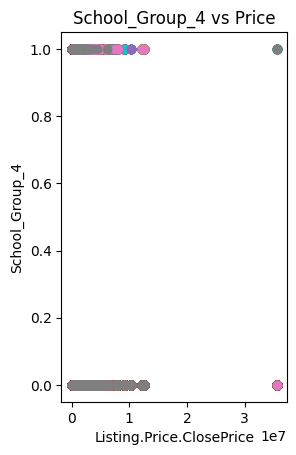

In [29]:
smd_eight = []
smd_five_eight = []
smd_below = []
one_value_col = []
price_std = housing_hot_encoding['Listing.Price.ClosePrice'].std()
for i in housing_hot_encoding.columns:
    counts = housing_hot_encoding[i].value_counts()
    for c in counts:
        if c/len(housing_hot_encoding)==1.0:
            one_value_col.append(i)
            housing_hot_encoding.drop(columns=i,inplace=True)
        elif c/len(housing_hot_encoding)>0.80:
            # print(i)
            # print(counts)
            if i in binary_cols:
                average_target_per_binary = housing_hot_encoding.groupby(i)['Listing.Price.ClosePrice'].mean()
                smd = abs(average_target_per_binary[1]-average_target_per_binary[0])/price_std
                if smd >0.8:
                    smd_eight.append(i)
                elif smd >0.5:
                    smd_five_eight.append(i)
                else:
                    smd_below.append(i)
            plot_corr(housing_hot_encoding,i)

In [30]:
print(len(smd_eight), len(smd_five_eight), len(smd_below),len(one_value_col))

67 105 376 0


In [31]:
# Drop specified columns from both training and test sets
housing_temp = housing_hot_encoding.drop(columns=smd_five_eight, errors='ignore')
housing_no_doms = housing_temp.drop(columns=smd_below, errors='ignore')

Test_temp = Test_hot_encoding.drop(columns=smd_five_eight, errors='ignore')
Test_no_doms = Test_temp.drop(columns=smd_below, errors='ignore')

# Print shapes for verification
print(f"Training dataset shape: {housing_no_doms.shape}")
print(f"Test dataset shape: {Test_no_doms.shape}")

Training dataset shape: (93117, 151)
Test dataset shape: (22039, 145)


# Imputation of NaN values

## Imputation of Latitude and Longitude

In [32]:
# Identify cities in Test but not in housing
cities_in_test = set(Test_no_doms['Location.Address.City'].unique())
cities_in_housing = set(housing_no_doms['Location.Address.City'].unique())
cities_not_in_housing = cities_in_test - cities_in_housing

# Filter Test data for cities not in housing and NaN latitude/longitude
filtered_test = Test_no_doms[Test_no_doms['Location.Address.City'].isin(cities_not_in_housing) & (Test_no_doms['Location.GIS.Latitude'].isna() | Test_no_doms['Location.GIS.Longitude'].isna())]

# Calculate average latitude and longitude from housing
avg_latitude = housing_no_doms['Location.GIS.Latitude'].mean()
avg_longitude = housing_no_doms['Location.GIS.Longitude'].mean()

# Count lines
num_lines = len(filtered_test)
print(f"Number of lines in Test with cities not in housing and NaN latitude or longitude: {num_lines}")

# Impute NaN values (if needed)
Test_no_doms.loc[Test_no_doms['Location.Address.City'].isin(cities_not_in_housing), 'Location.GIS.Latitude'] = Test_no_doms['Location.GIS.Latitude'].fillna(avg_latitude)
Test_no_doms.loc[Test_no_doms['Location.Address.City'].isin(cities_not_in_housing), 'Location.GIS.Longitude'] = Test_no_doms['Location.GIS.Longitude'].fillna(avg_longitude)

Number of lines in Test with cities not in housing and NaN latitude or longitude: 7


In [33]:
# Create a subset of the training data where latitude and longitude are not missing
housing_geo_notna = housing_no_doms[
    housing_no_doms["Location.GIS.Longitude"].notna() & housing_no_doms["Location.GIS.Latitude"].notna()
]

# Initialize dictionaries for storing mean latitude and longitude by city
city_lats = {}
city_longs = {}

# Extract relevant columns
lats = housing_geo_notna["Location.GIS.Latitude"]
longs = housing_geo_notna["Location.GIS.Longitude"]
cities = housing_geo_notna["Location.Address.City"]

# Compute mean latitude and longitude for each city
for ind in housing_geo_notna.index:
    if isinstance(lats[ind], np.float64) and isinstance(longs[ind], np.float64):
        city = cities[ind]
        lat = lats[ind]
        long = longs[ind]
        if city not in city_lats:
            city_lats[city] = []
            city_longs[city] = []

        city_lats[city].append(lat)
        city_longs[city].append(long)

for city in city_lats:
    city_lats[city] = np.mean(city_lats[city])
    city_longs[city] = np.mean(city_longs[city])

# Impute missing latitude and longitude values in the training dataset
housing_no_doms.loc[housing_no_doms["Location.GIS.Longitude"].isna(), "Location.GIS.Longitude"] = housing_no_doms["Location.Address.City"].map(city_longs)
housing_no_doms.loc[housing_no_doms["Location.GIS.Latitude"].isna(), "Location.GIS.Latitude"] = housing_no_doms["Location.Address.City"].map(city_lats)

# Impute missing latitude and longitude values in the test dataset
Test_no_doms.loc[Test_no_doms["Location.GIS.Longitude"].isna(), "Location.GIS.Longitude"] = Test_no_doms["Location.Address.City"].map(city_longs)
Test_no_doms.loc[Test_no_doms["Location.GIS.Latitude"].isna(), "Location.GIS.Latitude"] = Test_no_doms["Location.Address.City"].map(city_lats)

# Drop rows with missing latitude or longitude after imputation
housing_no_doms = housing_no_doms.dropna(subset=["Location.GIS.Longitude", "Location.GIS.Latitude"])
Test_no_doms = Test_no_doms.dropna(subset=["Location.GIS.Longitude", "Location.GIS.Latitude"])

# Compute the minimum longitude and maximum latitude based on the training dataset
long_min = housing_no_doms["Location.GIS.Longitude"].min()
lat_max = housing_no_doms["Location.GIS.Latitude"].max()

# Subtract the minimum/maximum values to normalize latitudes and longitudes
housing_no_doms["Location.GIS.Longitude"] -= long_min
housing_no_doms["Location.GIS.Latitude"] -= lat_max

Test_no_doms["Location.GIS.Longitude"] -= long_min
Test_no_doms["Location.GIS.Latitude"] -= lat_max

In [34]:
housing_no_doms=housing_no_doms.drop(columns = ['Location.Address.City'])
Test_no_doms=Test_no_doms.drop(columns = ['Location.Address.City'])

In [35]:
print(f"Training dataset shape: {housing_no_doms.shape}")
print(f"Test dataset shape: {Test_no_doms.shape}")

Training dataset shape: (93104, 150)
Test dataset shape: (22039, 144)


In [36]:
# Check if all columns in Test are present in housing_expanded
test_cols = set(Test_expanded.columns)
housing_cols = set(housing_expanded.columns)

missing_cols = test_cols - housing_cols
extra_cols = housing_cols - test_cols

if missing_cols:
    print("Columns in Test not found in housing_expanded:")
    print(missing_cols)
else:
    print("All columns in Test are present in housing_expanded.")

if extra_cols:
    print("\nColumns in housing_expanded not found in Test:")
    print(extra_cols)
else:
    print("\nAll columns in housing_expanded are present in Test.")

Columns in Test not found in housing_expanded:
{'Listing.ListingId'}

Columns in housing_expanded not found in Test:
{'Listing.Price.ClosePrice'}


## Imputation of missing variables

In [37]:
housing_v1=housing_no_doms
Test_v1=Test_no_doms

In [38]:
miss = housing_v1.isna().sum()
# Remove columns with 0% missing values
miss_filtered = miss[miss > 0]

# Sort the remaining columns in descending order of missing percentage
miss_sorted = miss_filtered.sort_values(ascending=False)
print(miss_sorted)
# Define the list of columns for analysis
columns_to_analyze = miss_filtered.keys()

# Calculate descriptive statistics only for columns that are fully numeric (int or float)
stats_summary = {}
for col in columns_to_analyze:
    if col in housing_v1.columns:
        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(housing_v1[col]):
            col_data = housing_v1[col].dropna()  # Drop missing values for analysis
            stats_summary[col] = {
                'Min': col_data.min(),
                'Max': col_data.max(),
                'Mean': col_data.mean(),
                'Median': col_data.median(),
                'Standard Deviation': col_data.std(),
                'Unique Values': col_data.nunique(),
                'Most Frequent': col_data.mode()[0] if not col_data.mode().empty else None
            }

# Convert to a DataFrame for better display
stats_summary_df = pd.DataFrame(stats_summary)

for col in columns_to_analyze:
    if col == 'Structure.LivingArea':
        Test_v1[col] = Test_v1[col].fillna(stats_summary[col]['Median'])
        continue
    elif col == 'Structure.BathroomsFull':
        housing_v1[col] = housing_v1[col].fillna(1)
        Test_v1[col] = Test_v1[col].fillna(1)
    elif col == 'Structure.BathroomsHalf' or col == 'Structure.GarageSpaces' or col == 'Structure.FireplacesTotal':
        housing_v1[col] = housing_v1[col].fillna(0)
        Test_v1[col] = Test_v1[col].fillna(0)
    elif col == 'Structure.BedroomsTotal' or col == 'Structure.Rooms.RoomsTotal':
        housing_v1 = housing_v1.dropna(subset=[col])
        Test_v1[col] = Test_v1[col].fillna(0)
    else:
        housing_v1[col] = housing_v1[col].fillna(stats_summary[col]['Median'])
        Test_v1[col] = Test_v1[col].fillna(stats_summary[col]['Median'])


Structure.FireplacesTotal                44798
ImageData.style.stories.summary.label    17746
ImageData.q1q6.summary.exterior          15879
ImageData.c1c6.summary.exterior          13817
Structure.GarageSpaces                   12570
ImageData.q1q6.summary.bathroom           5750
ImageData.c1c6.summary.bathroom           5723
ImageData.q1q6.summary.kitchen            4448
ImageData.c1c6.summary.kitchen            4431
Structure.YearBuilt                       3535
ImageData.q1q6.summary.interior           3493
ImageData.c1c6.summary.interior           3489
Structure.LivingArea                      2319
Structure.BathroomsHalf                   1915
Structure.BathroomsFull                   1910
ImageData.q1q6.summary.property             21
Structure.BedroomsTotal                     13
Structure.Rooms.RoomsTotal                   1
dtype: int64


In [39]:
print(housing_v1.shape)
print(Test_v1.shape)

(93090, 150)
(22039, 144)


## Impute living area based on total rooms

In [40]:
housing_area_notna = housing_v1[housing_v1["Structure.LivingArea"].notna()]

roomstotal_livingarea = {}
roomstotals = housing_area_notna["Structure.Rooms.RoomsTotal"]
livingareas = housing_area_notna["Structure.LivingArea"]

# find the mean of living area for different number of rooms
for ind in housing_area_notna.index:
  if isinstance(livingareas[ind], np.float64):
    roomstotal = roomstotals[ind]
    livingarea = livingareas[ind]
    if roomstotal not in roomstotal_livingarea:
      roomstotal_livingarea[roomstotal] = []
    roomstotal_livingarea[roomstotal].append(livingarea)

# print(roomstotal_livingarea[10.0])
for rt in roomstotal_livingarea:
  size = len(roomstotal_livingarea[rt])
  temp = sum(roomstotal_livingarea[rt])
  # if rt == 10.0:
    # print(temp)
  roomstotal_livingarea[rt] = temp
  roomstotal_livingarea[rt] /= size

In [41]:
# Impute missing 'Structure.LivingArea' in the training set based on 'Structure.Rooms.RoomsTotal'
housing_v1.loc[housing_v1["Structure.LivingArea"].isna(), "Structure.LivingArea"] = (
    housing_v1["Structure.Rooms.RoomsTotal"].map(roomstotal_livingarea)
)

# Remove rows with NA in 'Structure.LivingArea' after imputation in the training set
housing_v1 = housing_v1.dropna(subset=["Structure.LivingArea"])
print("Shape of the training set after 'Structure.LivingArea' imputation:", housing_v1.shape)

# Impute missing 'Structure.LivingArea' in the test set using the same mapping
Test_v1.loc[Test_v1["Structure.LivingArea"].isna(), "Structure.LivingArea"] = (
    Test_v1["Structure.Rooms.RoomsTotal"].map(roomstotal_livingarea)
)

# Remove rows with NA in 'Structure.LivingArea' after imputation in the test set
print("Shape of the test set after 'Structure.LivingArea' imputation:", Test_v1.shape)

Shape of the training set after 'Structure.LivingArea' imputation: (93017, 150)
Shape of the test set after 'Structure.LivingArea' imputation: (22039, 144)


# Additional formatting and outliers

## Date formatting

In [42]:
# Convert 'Listing.Dates.CloseDate' to datetime in the training set
housing_v1["date"] = pd.to_datetime(housing_v1["Listing.Dates.CloseDate"])

# Calculate the minimum date from the training set to use as a reference
min_date = housing_v1["date"].min()

# Calculate 'days_since_start' for the training set
housing_v1["days_since_start"] = (housing_v1["date"] - min_date).dt.days

# Drop the original date columns from the training set
housing_v1 = housing_v1.drop(["Listing.Dates.CloseDate", "date"], axis=1)
print("Training set processed with 'days_since_start' feature added.")

# Convert 'Listing.Dates.CloseDate' to datetime in the test set
Test_v1["date"] = pd.to_datetime(Test_v1["Listing.Dates.CloseDate"])

# Calculate 'days_since_start' for the test set using the minimum date from the training set
Test_v1["days_since_start"] = (Test_v1["date"] - min_date).dt.days

# Drop the original date columns from the test set
Test_v1 = Test_v1.drop(["Listing.Dates.CloseDate", "date"], axis=1)
print("Test set processed with 'days_since_start' feature added.")

Training set processed with 'days_since_start' feature added.
Test set processed with 'days_since_start' feature added.


In [43]:
print(housing_v1.shape)
print(Test_v1.shape)

(93017, 150)
(22039, 144)


In [44]:
print(f"Number of total missing values: {housing_v1.isnull().sum().sum()}")
print(f"Number of total missing values: {Test_v1.isnull().sum().sum()}")

Number of total missing values: 0
Number of total missing values: 1017


In [45]:
# prompt: for missing values in 'ImageData.c1c6.summary.property ' of Test_v1 put the average of the same column in housing_v1

# Calculate the average of 'ImageData.c1c6.summary.property' in housing_v1
average_property_value = housing_v1['ImageData.c1c6.summary.property'].mean()

# Fill missing values in Test_v1 with the calculated average
Test_v1['ImageData.c1c6.summary.property'].fillna(average_property_value, inplace=True)

In [46]:
housing_v1.to_csv('/content/drive/MyDrive/Housing_v2.csv',index=False)
Test_v1.to_csv('/content/drive/MyDrive/Test_v2.csv',index=False)

## Outliers

In [47]:
housing_v2 = pd.read_csv('/content/drive/MyDrive/Housing_v2.csv')

max_index = housing_v2['Listing.Price.ClosePrice'].idxmax()
print(housing_v2['Listing.Price.ClosePrice'].max())
housing_v2 = housing_v2.drop(max_index)

max_index = housing_v2['Structure.BathroomsFull'].idxmax()
print(housing_v2['Structure.BathroomsFull'].max())
housing_v2 = housing_v2.drop(max_index)

max_index = housing_v2['Structure.FireplacesTotal'].idxmax()
print(housing_v2['Structure.FireplacesTotal'].max())
housing_v2 = housing_v2.drop(max_index)

# Filter rows where 'Structure.GarageSpaces' is greater than 20
rows_to_change = housing_v2[housing_v2['Structure.GarageSpaces'] > 20]
# Change the value to 20 in the filtered rows
housing_v2.loc[rows_to_change.index, 'Structure.GarageSpaces'] = 20


# Filter rows where 'Structure.YearBuilt' is less than 1800
rows_to_change = housing_v2[housing_v2['Structure.YearBuilt'] < 1800]
# Change the value to 1800 in the filtered rows
housing_v2.loc[rows_to_change.index, 'Structure.YearBuilt'] = 1800

housing_v2.shape

35550000.0
75.0
21.0


(93014, 150)

In [48]:
#Very low house prices are difficult to predict, so we remove lines with price lower than 10000
index_to_remove = housing_v2[housing_v2['Listing.Price.ClosePrice'] < 10000].index
print('Removed ', len(index_to_remove), ' lines with price lower than 10000')
housing_v2 = housing_v2.drop(index_to_remove)

housing_v2.shape

Removed  36  lines with price lower than 10000


(92978, 150)

In [49]:
housing_v2.to_csv('/content/drive/MyDrive/Housing_v3.csv',index=False)

# Feature Selection and Dimensionality Reduction for Predicting

In [50]:
housing_v3 = pd.read_csv("/content/drive/MyDrive/Housing_v3.csv")
housing_v3.shape

(92978, 150)

In [51]:
perce_miss = housing_v3.isna().sum()/len(housing_v3)
for i in perce_miss:
      if i >0.0:
        print(perce_miss[perce_miss == i].index[0], i )

### Correlation Analysis and Feature Dropping

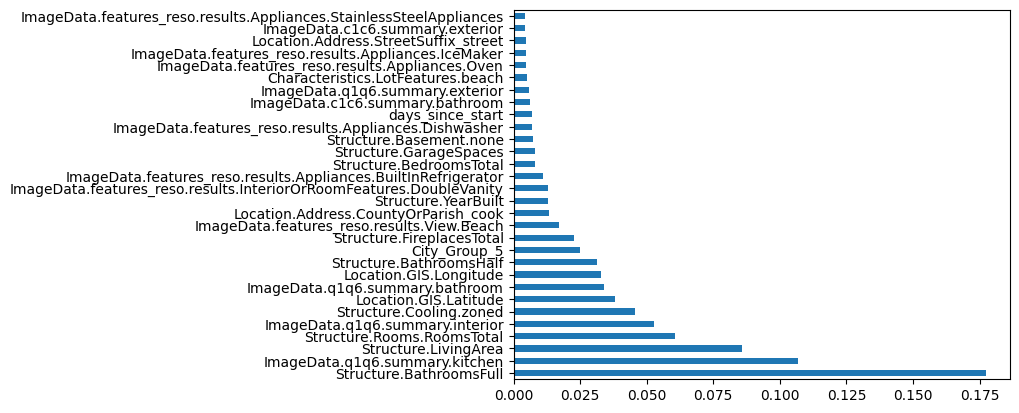

In [52]:
X = housing_v3.drop(['Listing.Price.ClosePrice'], axis=1)
y = housing_v3['Listing.Price.ClosePrice']
corr_matrix = X.corr().abs()
high_corr_var=np.where(corr_matrix>0.8)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
# Drop the second feature from each pair
features_to_drop = [pair[1] for pair in high_corr_var]
# Drop these features from the DataFrame
X_dropped = X.drop(columns=features_to_drop)
model = ExtraTreesRegressor()
model.fit(X_dropped,y)
# print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X_dropped.columns)
sorted_feat_importances = feat_importances.sort_values(ascending=False)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

### Feature Selection

In [53]:
sorted_feat_importances = feat_importances.sort_values(ascending=False)
percentage_series = (sorted_feat_importances * 100).round(4)
cols_to_keep = percentage_series[percentage_series>0.5].index
train_cols=cols_to_keep.tolist()
train_cols.append('Listing.Price.ClosePrice')
housing_v3=housing_v3[train_cols]
print(housing_v3.shape)
housing_v3.head()

(92978, 26)


,Structure.BathroomsFull,ImageData.q1q6.summary.kitchen,Structure.LivingArea,Structure.Rooms.RoomsTotal,ImageData.q1q6.summary.interior,Structure.Cooling.zoned,Location.GIS.Latitude,ImageData.q1q6.summary.bathroom,Location.GIS.Longitude,Structure.BathroomsHalf,...,ImageData.features_reso.results.Appliances.BuiltInRefrigerator,Structure.BedroomsTotal,Structure.GarageSpaces,Structure.Basement.none,ImageData.features_reso.results.Appliances.Dishwasher,days_since_start,ImageData.c1c6.summary.bathroom,ImageData.q1q6.summary.exterior,Characteristics.LotFeatures.beach,Listing.Price.ClosePrice
0,7.0,3.2,787.0,10.0,3.0,1,-0.321074,3.3,4.424625,2.0,...,0,5.0,5.0,0,0,251,3.2,3.0,0,1500000.0
1,3.0,2.5,4679.0,10.0,2.7,0,-0.096784,2.6,4.048727,1.0,...,0,4.0,2.0,0,0,305,2.0,3.5,0,725000.0
2,2.0,2.3,1700.0,8.0,2.4,0,-0.069465,2.6,4.028478,0.0,...,1,4.0,0.0,1,1,311,2.0,3.5,0,130000.0
3,1.0,4.3,900.0,5.0,3.4,0,-0.919447,4.2,4.557885,0.0,...,0,3.0,2.5,1,0,141,4.2,4.5,0,110000.0
4,2.0,3.9,1200.0,4.0,3.2,0,-0.046846,4.1,3.995096,0.0,...,0,3.0,0.0,1,1,222,3.7,3.5,0,75000.0


### Save the Dataset

In [54]:
Test_v2 = pd.read_csv('/content/drive/MyDrive/Test_v2.csv')
test_cols=cols_to_keep.tolist()
test_cols.append('Listing.ListingId')
Test_v3=Test_v2[test_cols]
Test_v3.head()

,Structure.BathroomsFull,ImageData.q1q6.summary.kitchen,Structure.LivingArea,Structure.Rooms.RoomsTotal,ImageData.q1q6.summary.interior,Structure.Cooling.zoned,Location.GIS.Latitude,ImageData.q1q6.summary.bathroom,Location.GIS.Longitude,Structure.BathroomsHalf,...,ImageData.features_reso.results.Appliances.BuiltInRefrigerator,Structure.BedroomsTotal,Structure.GarageSpaces,Structure.Basement.none,ImageData.features_reso.results.Appliances.Dishwasher,days_since_start,ImageData.c1c6.summary.bathroom,ImageData.q1q6.summary.exterior,Characteristics.LotFeatures.beach,Listing.ListingId
0,1.0,2.4,1568.0,0.0,2.7,0,-1.103897,2.8,3.107959,0.0,...,0,0.0,0.0,0,1,402,2.0,3.1,0,mrd10801802
1,1.0,3.2,1568.0,0.0,3.0,0,-0.443883,3.3,3.741734,0.0,...,0,0.0,0.0,0,0,391,3.2,3.5,0,mrd10966126
2,1.0,3.0,1568.0,0.0,3.0,0,-0.571196,3.4,4.625567,0.0,...,0,0.0,0.0,0,1,375,3.3,3.8,0,mrd11165969
3,1.0,3.2,1568.0,0.0,3.0,0,-0.785161,3.3,4.416910,0.0,...,0,0.0,0.0,0,0,366,3.2,3.5,0,mrd11185881
4,6.0,3.6,8960.0,17.0,3.7,1,-0.318501,3.9,4.354517,2.0,...,0,6.0,5.0,0,0,396,3.9,3.7,0,mrd11198825


In [55]:
housing_v3.to_csv('/content/drive/MyDrive/final_train.csv',index=False)
Test_v3.to_csv('/content/drive/MyDrive/final_test.csv',index=False)

# Predict

In [56]:
housing = pd.read_csv("/content/drive/MyDrive/final_train.csv")
print(housing.shape)

(92978, 26)


In [57]:
#Predict with a linear model for comparison

# Define your features and target
X = housing.drop(columns=['Listing.Price.ClosePrice'])  # Assuming 'price' is the target column
y = housing['Listing.Price.ClosePrice']

# Split data into training and validation sets (80% train, 20% test)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Calculate evaluation metrics
mse = mean_squared_error(y_val, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_val, y_pred)
mape = mean_absolute_percentage_error(y_val, y_pred)  # Convert to percentage

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Squared Error (MSE): 58319783925.54
Root Mean Squared Error (RMSE): 241494.89
Mean Absolute Error (MAE): 123482.67
Mean Absolute Percentage Error (MAPE): 0.43%


In [58]:
# Generate a random seed
random_seed = 42

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [20, 30],
}

# Initialize the model
rf = RandomForestRegressor(random_state=random_seed)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)

# Fit the model to the data
print("Starting Grid Search...")
grid_search.fit(X_train, y_train)
print("Grid Search Complete.")

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)


# Calculate evaluation metrics
mse = mean_squared_error(y_val, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_val, y_pred)
mape = mean_absolute_percentage_error(y_val, y_pred)  # Convert to percentage

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Starting Grid Search...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Grid Search Complete.
Best Parameters: {'max_depth': 30, 'n_estimators': 200}
Mean Squared Error (MSE): 27430835710.49
Root Mean Squared Error (RMSE): 165622.57
Mean Absolute Error (MAE): 62638.52
Mean Absolute Percentage Error (MAPE): 0.19%


In [59]:
test_data = pd.read_csv("/content/drive/MyDrive/final_test.csv")
print(test_data.shape)

(22039, 26)


In [60]:
#Retrain on the entire training set and predict on the test set

train_data=housing

features = train_data.drop(columns='Listing.Price.ClosePrice').columns.tolist()
target = 'Listing.Price.ClosePrice'

# Initialize the model
rf = RandomForestRegressor(random_state=random_seed)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)

# Fit the model to the data
print("Starting Grid Search...")
grid_search.fit(train_data[features], train_data[target])
print("Grid Search Complete.")

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(test_data[features])

Starting Grid Search...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Grid Search Complete.
Best Parameters: {'max_depth': 30, 'n_estimators': 200}


In [61]:
#Save the final prediction
output_df = pd.DataFrame({target: predictions}, index=test_data['Listing.ListingId'])
output_df.index.name = 'Listing.ListingId'  # Set the index name
output_df.to_csv('/content/drive/MyDrive/predictions.csv', index=True)  # Save with the index column